In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ar_wav.csv")
print(data)

        Energy       r     wavef   radwave
0    -0.579689   0.001  0.000001  0.001000
1    -0.579689   0.004  0.000016  0.004000
2    -0.579689   0.007  0.000048  0.006812
3    -0.579689   0.010  0.000095  0.009474
4    -0.579689   0.013  0.000156  0.011991
...        ...     ...       ...       ...
8336 -0.579689  25.009  0.081119  0.003244
8337 -0.579689  25.012  0.081373  0.003253
8338 -0.579689  25.015  0.081627  0.003263
8339 -0.579689  25.018  0.081882  0.003273
8340 -0.579689  25.021  0.082138  0.003283

[8341 rows x 4 columns]


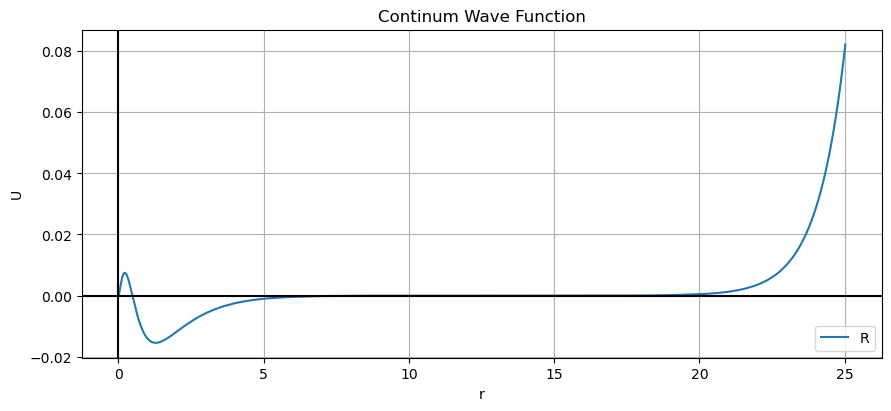

In [3]:
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Continum Wave Function")
#plt.plot(data["r"],data["radwave"])
plt.plot(data["r"],data["wavef"])
plt.xlabel("r")
plt.ylabel("U")
ax.axhline(0, c="black")
ax.axvline(0, c="black")
plt.legend("R")
plt.grid()
plt.savefig("Continum Wave Function", format = "png", dpi = 600)
plt.show()

           E    l       r         U          R
0      1.999  0.0   0.001  0.014293  14.293377
1      1.999  0.0   0.002  0.028587  14.293377
2      1.999  0.0   0.003  0.042369  14.123089
3      1.999  0.0   0.004  0.055648  13.912047
4      1.999  0.0   0.005  0.068433  13.686500
...      ...  ...     ...       ...        ...
49997  1.999  2.0  24.997  0.509904   0.020399
49998  1.999  2.0  24.998  0.511638   0.020467
49999  1.999  2.0  24.999  0.513371   0.020536
50000  1.999  2.0  25.000  0.515101   0.020604
50001  1.999  2.0  25.001  0.516829   0.020672

[50002 rows x 5 columns]


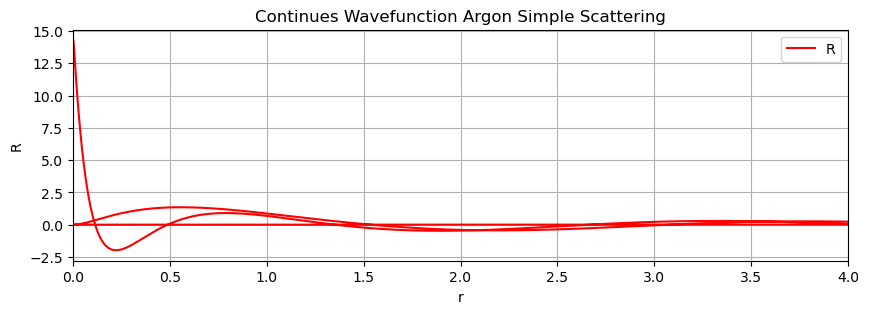

In [4]:
file = open("cont_wfn_total.dat","r")
#print(file.read())
data = []
for line in file:
    values = line.split()
    data.append([float(value) for value in values])
#print(data)
df = pd.DataFrame(data=data, columns=["E","l","r","U","R"])
print(df)
plt.figure(figsize=(10,3))
plt.plot(df["r"],df["R"], color = "r")
plt.xlim(0,4)
plt.grid()
plt.title("Continues Wavefunction Argon Simple Scattering")
plt.xlabel("r")
plt.ylabel("R")
plt.legend("R")
plt.savefig("Simple Scattering Argon", format="png", dpi = 300)
plt.show()

In [4]:
print(df["l"].unique())


[0. 2.]


In [5]:
s_data = df[df["l"]==0]

In [6]:
print(s_data)

           E    l       r         U          R
0      1.999  0.0   0.001  0.014293  14.293377
1      1.999  0.0   0.002  0.028587  14.293377
2      1.999  0.0   0.003  0.042369  14.123089
3      1.999  0.0   0.004  0.055648  13.912047
4      1.999  0.0   0.005  0.068433  13.686500
...      ...  ...     ...       ...        ...
24996  1.999  0.0  24.997  0.960673   0.038432
24997  1.999  0.0  24.998  0.960111   0.038408
24998  1.999  0.0  24.999  0.959544   0.038383
24999  1.999  0.0  25.000  0.958974   0.038359
25000  1.999  0.0  25.001  0.958399   0.038334

[25001 rows x 5 columns]


# Normalised Wave Function


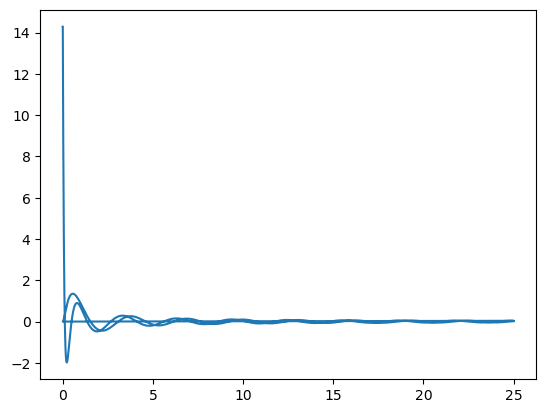

In [5]:
file = open("cont_wfn_total.dat","r")
#print(file.read())
data = []
for line in file:
    values = line.split()
    data.append([float(value) for value in values])
#print(data)
df = pd.DataFrame(data=data, columns=["E","l","r","U","R"])
unnormalised_wavefunction = df["U"]
normalised_wavefunction = df["U"]/df["r"]
plt.plot(df["r"],normalised_wavefunction)

The photoionization cross-section ($\sigma_c$) under influence of a linearly polarized electromagnetic field is written as
$$\sigma_c=\frac{4}{3}\pi^2\alpha E_ph |<R_{El}|r|R_{nl}>|^2$$
Where E_ph is the inciden photon energy
$\alpha = \frac{1}{137} a.u.$
$R_nl$ is the radial bound state wavefunction with binding energy

ValueError: 5 columns passed, passed data had 8 columns

In [ ]:
print(df.head())

In [2]:
import numpy as np
import scipy.integrate as integrate
import pandas as pd

def calculate_dipole_matrix_element(initial_state, final_state):
    """Calculates the dipole matrix element."""
    def integrand(r):
        return final_state['uf(i)'] * r * initial_state['U']
    return integrate.quad(integrand, 0, np.inf)[0]

def calculate_photoionization_cross_section(initial_state, final_state, energy):
    """Calculates the photoionization cross-section."""
    alpha = 7.2973525693e-3  # Fine structure constant
    c = 299792458  # Speed of light in m/s (convert to atomic units if necessary)
    dipole_matrix_element = calculate_dipole_matrix_element(initial_state, final_state)
    cross_section = 4 * np.pi**2 * alpha * energy / (3 * c) * dipole_matrix_element**2
    return cross_section

unbound = open("normwfn.dat","r")
data1 = []
for line in unbound:
    values = line.split()
    data.append([float(value) for value in values])
#print(data)
dfUnbound = pd.DataFrame(data=data, columns=["l","E(i)","rd(i)","uf(i)","rf(i)"])

bound = open("cont_wfn_total.dat","r")
#print(file.read())
data = []
for line in bound:
    values = line.split()
    data.append([float(value) for value in values])
#print(data)
dfBound = pd.DataFrame(data=data, columns=["E","l","r","U","R"])
# Calculate photoionization cross-sections
for energy in dfUnbound['E(i)'].unique():
    initial_state = dfBound[dfBound['E'] == 0]
    final_state = dfUnbound[dfUnbound['E(i)'] == energy]

    if not final_state.empty:
        cross_section = calculate_photoionization_cross_section(initial_state, final_state, energy)
        print(f"Energy: {energy}, Cross-section: {cross_section}")
    else:
        print(f"No final state found for energy {energy}")

TypeError: cannot convert the series to <class 'float'>

# Plot r vs u3p vs U es for particular energy value

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

normalised_wavefuction_3p = open("bwfn_norm_R(3p)_result.dat", "r")
data = []
for line in normalised_wavefuction_3p:
    values = line.split()
    data.append([float(value) for value in values])

df_normalised_wavefunction_3p = pd.DataFrame(data = data, columns=["energy", "rd(i)", "Rnorm(i)", "UNorm(i)"])
print(df_normalised_wavefunction_3p.head())

     energy  rd(i)  Rnorm(i)  UNorm(i)
0 -0.579689  0.001  0.052692  0.000053
1 -0.579689  0.004  0.210767  0.000843
2 -0.579689  0.007  0.358937  0.002513
3 -0.579689  0.010  0.499203  0.004992
4 -0.579689  0.013  0.631828  0.008214


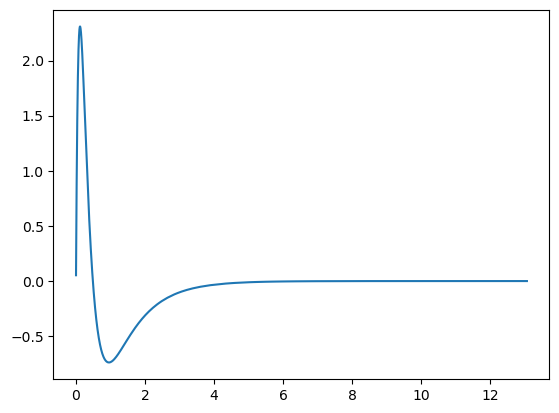

In [7]:
plt.plot(df_normalised_wavefunction_3p["rd(i)"], df_normalised_wavefunction_3p["Rnorm(i)"])

# $u3p$ vs $u\epsilon s$ for Photoelectron Energy 0.34 atomic unit

     energy  rd(i)  Rnorm(i)  UNorm(i)
0 -0.579689  0.001  0.052692  0.000053
1 -0.579689  0.004  0.210767  0.000843
2 -0.579689  0.007  0.358937  0.002513
3 -0.579689  0.010  0.499203  0.004992
4 -0.579689  0.013  0.631828  0.008214
     l  E(910)  rd(i)  UNorm(i)     uf(i)     fo(i)         fq(i)
0  0.0   0.919  0.001  0.000053  0.000000  0.000000  0.000000e+00
1  0.0   0.919  0.004  0.000843  0.000000  0.000000  0.000000e+00
2  0.0   0.919  0.007  0.002513  0.052382  0.000132  9.212832e-07
3  0.0   0.919  0.010  0.004992  0.070715  0.000353  3.530086e-06
4  0.0   0.919  0.013  0.008214  0.086827  0.000713  9.271245e-06


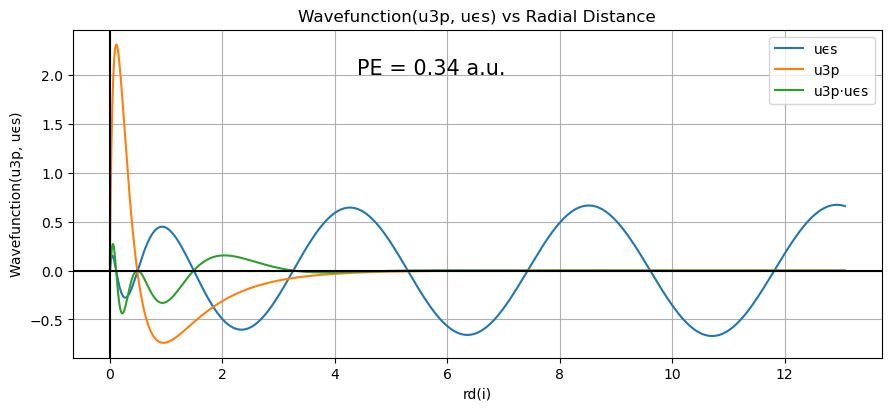

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

normalised_wavefuction_3p = open("bwfn_norm_R(3p)_result.dat", "r")
data = []
for line in normalised_wavefuction_3p:
    values = line.split()
    data.append([float(value) for value in values])

df_normalised_wavefunction_3p = pd.DataFrame(data = data, columns=["energy", "rd(i)", "Rnorm(i)", "UNorm(i)"])
print(df_normalised_wavefunction_3p.head())

r_continuum = open("r_continuum.dat", "r")
data = []
for line in r_continuum:
    values = line.split()
    data.append([float(value) for value in values])

df_r_continuum = pd.DataFrame(data = data, columns=["l", "E(910)", "rd(i)", "UNorm(i)","uf(i)","fo(i)","fq(i)"])
print(df_r_continuum.head())

df_s_shell = df_r_continuum.loc[df_r_continuum["l"] == 0]
rd = df_s_shell["rd(i)"]
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Wavefunction(u3p, u"+"\u03F5"+"s) vs Radial Distance")
plt.plot(rd, df_s_shell["uf(i)"], label = "u"+"\u03F5"+"s")
plt.plot(rd, df_normalised_wavefunction_3p["Rnorm(i)"], label = "u3p")
plt.plot(rd, df_s_shell["uf(i)"]*df_normalised_wavefunction_3p["Rnorm(i)"], label = "u3p"+"\u00B7"+"u"+"\u03F5"+"s")
plt.xlabel("rd(i)")
plt.ylabel("Wavefunction(u3p, u"+"\u03F5"+"s)")
ax.axhline(0, c="black")
ax.axvline(0, c="black")
ax.text(4.4, 2, f"PE = {round(0.919-0.579,3)} a.u.", fontsize=15)
plt.legend()
plt.grid()
plt.savefig("u3pvsues.png", format = "png", dpi = 300)
plt.show()


# $u3p$ vs $u\epsilon d$ for Photoelectron Energy 0.34 atomic unit

     energy  rd(i)  Rnorm(i)  UNorm(i)
0 -0.579689  0.001  0.052692  0.000053
1 -0.579689  0.004  0.210767  0.000843
2 -0.579689  0.007  0.358937  0.002513
3 -0.579689  0.010  0.499203  0.004992
4 -0.579689  0.013  0.631828  0.008214
     l  E(910)  rd(i)  UNorm(i)     uf(i)     fo(i)         fq(i)
0  0.0   0.919  0.001  0.000053  0.000000  0.000000  0.000000e+00
1  0.0   0.919  0.004  0.000843  0.000000  0.000000  0.000000e+00
2  0.0   0.919  0.007  0.002513  0.052382  0.000132  9.212832e-07
3  0.0   0.919  0.010  0.004992  0.070715  0.000353  3.530086e-06
4  0.0   0.919  0.013  0.008214  0.086827  0.000713  9.271245e-06


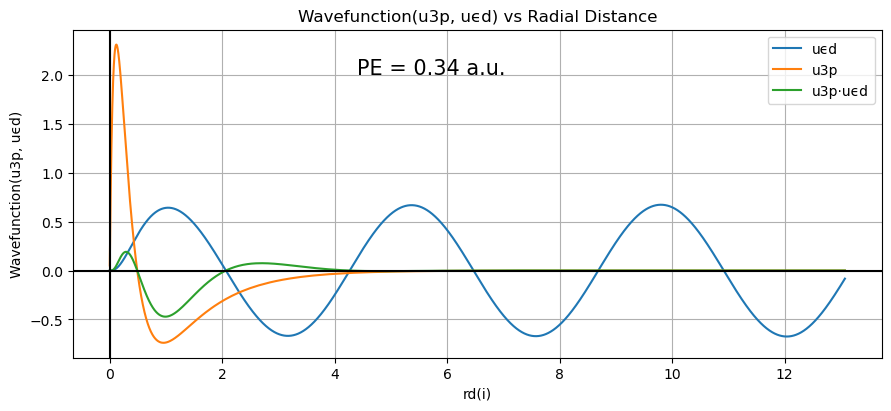

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

normalised_wavefuction_3p = open("bwfn_norm_R(3p)_result.dat", "r")
data = []
for line in normalised_wavefuction_3p:
    values = line.split()
    data.append([float(value) for value in values])

df_normalised_wavefunction_3p = pd.DataFrame(data = data, columns=["energy", "rd(i)", "Rnorm(i)", "UNorm(i)"])
print(df_normalised_wavefunction_3p.head())

r_continuum = open("r_continuum.dat", "r")
data = []
for line in r_continuum:
    values = line.split()
    data.append([float(value) for value in values])

df_r_continuum = pd.DataFrame(data = data, columns=["l", "E(910)", "rd(i)", "UNorm(i)","uf(i)","fo(i)","fq(i)"])
print(df_r_continuum.head())

df_d_shell = df_r_continuum.loc[df_r_continuum["l"] == 2]
df_d_shell = df_d_shell.reset_index(drop=True)

rd = df_d_shell["rd(i)"]
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Wavefunction(u3p, u"+"ϵ"+"d) vs Radial Distance")
plt.plot(rd, df_d_shell["uf(i)"], label = "u"+"ϵ"+"d")
plt.plot(rd, df_normalised_wavefunction_3p["Rnorm(i)"], label = "u3p")
plt.plot(rd, df_d_shell["uf(i)"]*df_normalised_wavefunction_3p["Rnorm(i)"], label = "u3p"+"\u00B7"+"u"+"\u03F5"+"d")
plt.xlabel("rd(i)")
plt.ylabel("Wavefunction(u3p, u"+"ϵ"+"d)")
ax.axhline(0, c="black")
ax.axvline(0, c="black")
ax.text(4.4, 2, f"PE = {round(0.919-0.579,3)} a.u.", fontsize=15)
plt.legend()
plt.grid()
plt.savefig("u3pvsued.png", format = "png", dpi = 300)
plt.show()

In [10]:
df_d_shell = df_d_shell.drop_duplicates(subset = "rd(i)", keep = False)
df_d_shell = df_d_shell.reset_index(drop=True)
print(df_d_shell.head(20))
df_d_shell["rd(i)"].sum()

      l  E(910)  rd(i)  UNorm(i)     uf(i)         fo(i)         fq(i)
0   2.0   0.919  0.001  0.000053  0.000000  0.000000e+00  0.000000e+00
1   2.0   0.919  0.004  0.000843  0.000000  0.000000e+00  0.000000e+00
2   2.0   0.919  0.007  0.002513  0.000009  2.139086e-08  1.497360e-10
3   2.0   0.919  0.010  0.004992  0.000024  1.216278e-07  1.216278e-09
4   2.0   0.919  0.013  0.008214  0.000053  4.316426e-07  5.611354e-09
5   2.0   0.919  0.016  0.012114  0.000096  1.165835e-06  1.865335e-08
6   2.0   0.919  0.019  0.016634  0.000158  2.633934e-06  5.004475e-08
7   2.0   0.919  0.022  0.021716  0.000242  5.245952e-06  1.154109e-07
8   2.0   0.919  0.025  0.027309  0.000348  9.514794e-06  2.378699e-07
9   2.0   0.919  0.028  0.033361  0.000481  1.605208e-05  4.494581e-07
10  2.0   0.919  0.031  0.039825  0.000642  2.556485e-05  7.925104e-07
11  2.0   0.919  0.034  0.046660  0.000833  3.885183e-05  1.320962e-06
12  2.0   0.919  0.037  0.053821  0.001055  5.678695e-05  2.101117e-06
13  2.

28486.067

In [11]:
df_d_shell["rd(i)"].equals(df_s_shell["rd(i)"])

True

In [12]:
matrix_element = open("bouncontinuum.dat","r")
data = []
for line in matrix_element:
    values = line.split()
    data.append([float(value) for value in values])

df_matrix_element = pd.DataFrame(data = data, columns = ["l","E(j)","matelement(j)"])
print(df_matrix_element.head())

     l   E(j)  matelement(j)
0  0.0  0.011       1.035789
1  0.0  0.012       1.033241
2  0.0  0.013       1.030704
3  0.0  0.014       1.028178
4  0.0  0.015       1.025663


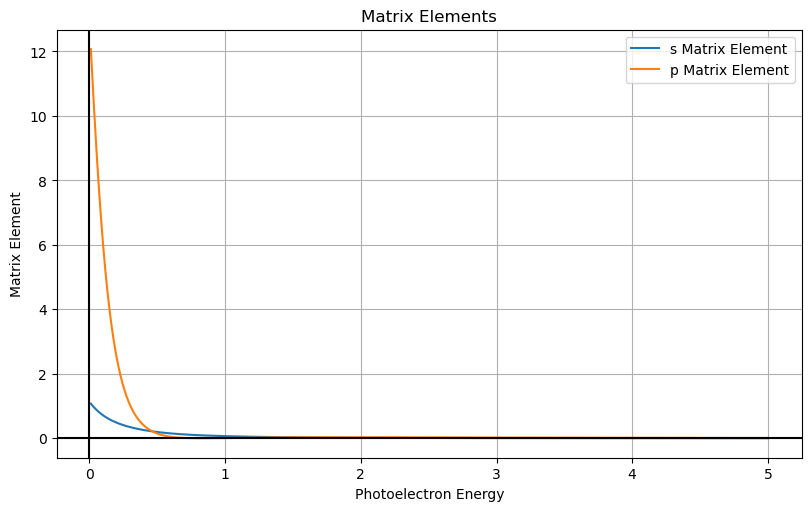

In [13]:
df_matrix_element_s = df_matrix_element.loc[df_matrix_element["l"] == 0]
df_matrix_element_p = df_matrix_element.loc[df_matrix_element["l"] == 2]


fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
ax.set(title="Matrix Elements")
plt.plot(df_matrix_element_s["E(j)"],df_matrix_element_s["matelement(j)"]**2,label = "s Matrix Element")
plt.plot(df_matrix_element_p["E(j)"],df_matrix_element_p["matelement(j)"]**2,label = "p Matrix Element")
plt.xlabel("Photoelectron Energy")
plt.ylabel("Matrix Element")
ax.axhline(0, c="black")
ax.axvline(0, c="black")
plt.legend()
plt.grid()
plt.savefig("Matrix Elements.png", format = "png", dpi = 300)
plt.show()

# Confinement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_Z_eff(Z, a1, a2, a3, a4, a5, a6, r):
    """Calculates the effective nuclear charge using the given equation."""
    return (Z + a1 * np.exp(-a2 * r) + a3 * r * np.exp(-a4 * r) + a5 * np.exp(-a6 * r)) / r

def V_eff(r, Z_eff, l):
    """Calculates the effective potential for the radial Schrödinger equation."""
    return (l*(l+1)/(2*r**2))-(Z_eff/r)

def numerov(R, r, V_eff, E, h, Z_eff, l):
    """
    Implements the Numerov method to solve the radial Schrödinger equation.

    Args:
        R: Initial wavefunction array.
        r: Radial coordinate array.
        V_eff: Effective potential function.
        E: Energy.
        h: Step size.
        Z_eff: Effective nuclear charge.
        l: Angular momentum quantum number.

    Returns:
        The final wavefunction array.
    """

    N = len(r)
    R_out = np.zeros_like(R)
    R_out[0] = R[0]
    R_out[1] = R[1]

    for i in range(2, N):
        k_i = 2 * (E - V_eff(r[i], Z_eff[i], l)) - 12 / h**2
        R_out[i] = (2 * R_out[i - 1] - R_out[i - 2] * (1 - 5 * h**2 * k_i / 12)) / (1 + h**2 * k_i / 12)

    return R_out

def solve_schrodinger(Z, a1, a2, a3, a4, a5, a6, l, E_initial, h, r_min, r_max, N, V_eff):
    """
    Solves the radial Schrödinger equation for a given potential, energy, and angular momentum.

    Args:
        Z: Effective nuclear charge.
        a1, a2, a3, a4, a5, a6: Coefficients for the effective nuclear charge calculation.
        l: Angular momentum quantum number.
        E_initial: Initial energy guess.
        h: Step size.
        r_min: Minimum radial coordinate.
        r_max: Maximum radial coordinate.
        N: Number of grid points.

    Returns:
        The final energy and wavefunction.
    """

    r = np.linspace(r_min, r_max, N)
    Z_eff = calculate_Z_eff(Z, a1, a2, a3, a4, a5, a6, r)
    R = np.zeros(N)
    R[0] = 0
    R[1] = 1e-6

    E = E_initial
    precision = 0
    while precision < 8:
        R_out = numerov(R, r, V_eff, E, h, Z_eff, l)
        R1 = R_out[-1]
        R2 = R_out[-2]
        check = R1 * R2
        if check < 0:
            precision += 1
            E -= h
            h /= 10
        else:
            precision = 0
            E += h

    return E, R_out

# Example usage
Z = 1  # Effective nuclear charge
a1 = 16.039
a2 = 2.007
a3 = -25.543
a4 = 4.525
a5 = 0.961
a6 = 0.443
l = 1  # Angular momentum quantum number
E_initial = -0.5  # Initial energy guess
h = 0.003
r_min = 0.01
r_max = 10
N = 1000

E, R_out = solve_schrodinger(Z, a1, a2, a3, a4, a5, a6, l, E_initial, h, r_min, r_max, N, V_eff)

print("Energy:", E)

# Plot the wavefunction
plt.plot(r, R_out)
plt.xlabel("r")
plt.ylabel("R(r)")
plt.title("Radial Wavefunction")
plt.show()

/tmp/ipykernel_30834/2696167038.py:36: RuntimeWarning: overflow encountered in scalar divide
  R_out[i] = (2 * R_out[i - 1] - R_out[i - 2] * (1 - 5 * h**2 * k_i / 12)) / (1 + h**2 * k_i / 12)
/tmp/ipykernel_30834/2696167038.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  R_out[i] = (2 * R_out[i - 1] - R_out[i - 2] * (1 - 5 * h**2 * k_i / 12)) / (1 + h**2 * k_i / 12)
/tmp/ipykernel_30834/2696167038.py:36: RuntimeWarning: overflow encountered in scalar multiply
  R_out[i] = (2 * R_out[i - 1] - R_out[i - 2] * (1 - 5 * h**2 * k_i / 12)) / (1 + h**2 * k_i / 12)
